In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0


In [2]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train, X_test = X_train/255.0 , X_test/255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9123 - loss: 0.2998
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9570 - loss: 0.1450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9669 - loss: 0.1107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9732 - loss: 0.0898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9764 - loss: 0.0755


In [6]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - 872us/step - accuracy: 0.9750 - loss: 0.0797


[0.07971407473087311, 0.9750000238418579]

In [7]:
test_sample = X_test[12].reshape(1,28,28)

In [8]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[-10.308104  ,  -9.671142  ,  -9.263744  ,  -2.275454  ,
          0.37057728,  -3.0365543 , -13.568112  ,   0.90179825,
         -2.702592  ,   7.72583   ]], dtype=float32)

In [9]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [10]:
probability_model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[1.4695056e-08, 2.7784326e-08, 4.1757129e-08, 4.5259196e-05,
        6.3806283e-04, 2.1142920e-05, 5.6411520e-10, 1.0853497e-03,
        2.9525889e-05, 9.9818051e-01]], dtype=float32)

In [11]:
probability_model.predict(test_sample).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


np.int64(9)

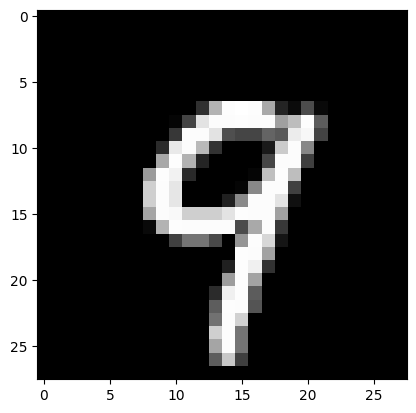

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_test[12], cmap='gray')